In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


In [2]:
y_train = y_train.reshape(-1,)

classes = ["airplane", "automobile","bird","cat","deer","	dog","frog","horse","ship","truck"]

def plot_images(X,y,index):
    plt.figure(figsize=(5,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    
#Normalizing the values
X_train = X_train/255
X_test = X_test/255


In [8]:
cnn = keras.models.Sequential([
        
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),

        #detects input_shape from previous layer
        layers.Flatten(),
        layers.Dense(100, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

In [9]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [10]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [11]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.6010 - accuracy: 0.4109
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1843 - accuracy: 0.5787
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0162 - accuracy: 0.6416
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9075 - accuracy: 0.6804
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8296 - accuracy: 0.7088
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7657 - accuracy: 0.7321
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7151 - accuracy: 0.7491
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6701 - accuracy: 0.7652
Epoch 9/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.6311 - accuracy: 0.7775
Epoch 10/10
1563/1563 [==============================] - 71s 45m

In [12]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.8709 - accuracy: 0.7084


[0.8709100484848022, 0.7084000110626221]

In [13]:
y_pred = cnn.predict(X_test)

In [14]:
y_classes = [np.argmax(i) for i in y_pred]

In [15]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_classes)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[794,  34,  41,  15,  15,  12,   4,  12,  48,  25],
       [ 25, 889,   6,  10,   2,   4,   6,   6,  12,  40],
       [ 81,  11, 645,  66,  41,  69,  44,  31,   9,   3],
       [ 21,  13,  77, 492,  49, 220,  46,  49,  16,  17],
       [ 26,  10, 103,  71, 578,  68,  44,  83,  13,   4],
       [ 12,   4,  68, 145,  29, 662,   8,  55,  10,   7],
       [  6,  10,  64,  85,  22,  32, 756,  12,   9,   4],
       [ 19,   7,  38,  33,  57,  66,   5, 756,   4,  15],
       [108,  52,  15,  12,   6,   4,   3,   8, 766,  26],
       [ 35, 118,  11,  18,   4,  12,  11,  18,  27, 746]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

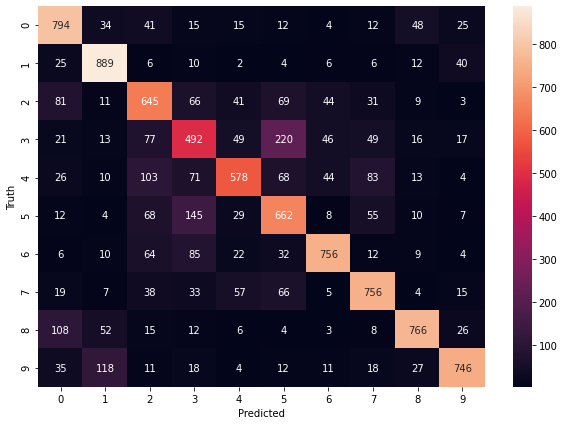

In [16]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
classes


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 '\tdog',
 'frog',
 'horse',
 'ship',
 'truck']